In [2]:
#load data
import pandas as pd
df = pd.read_csv('C:/Users/ktang28/ML_MiniProject_Classification_BCancer/data_clean.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


C:\Users\ktang28\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


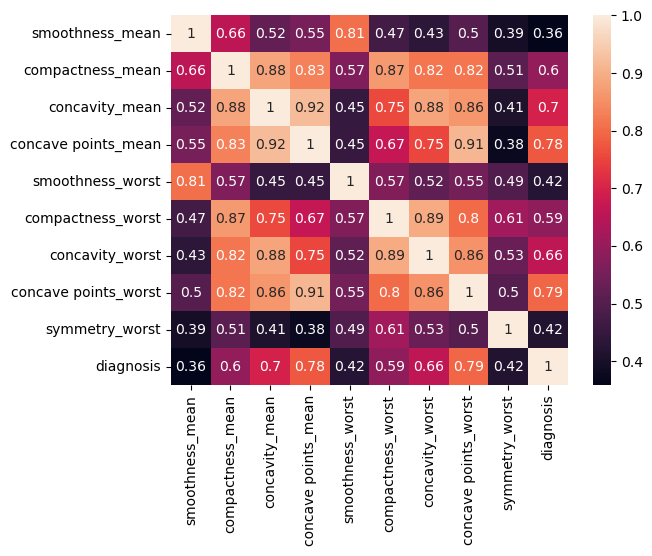

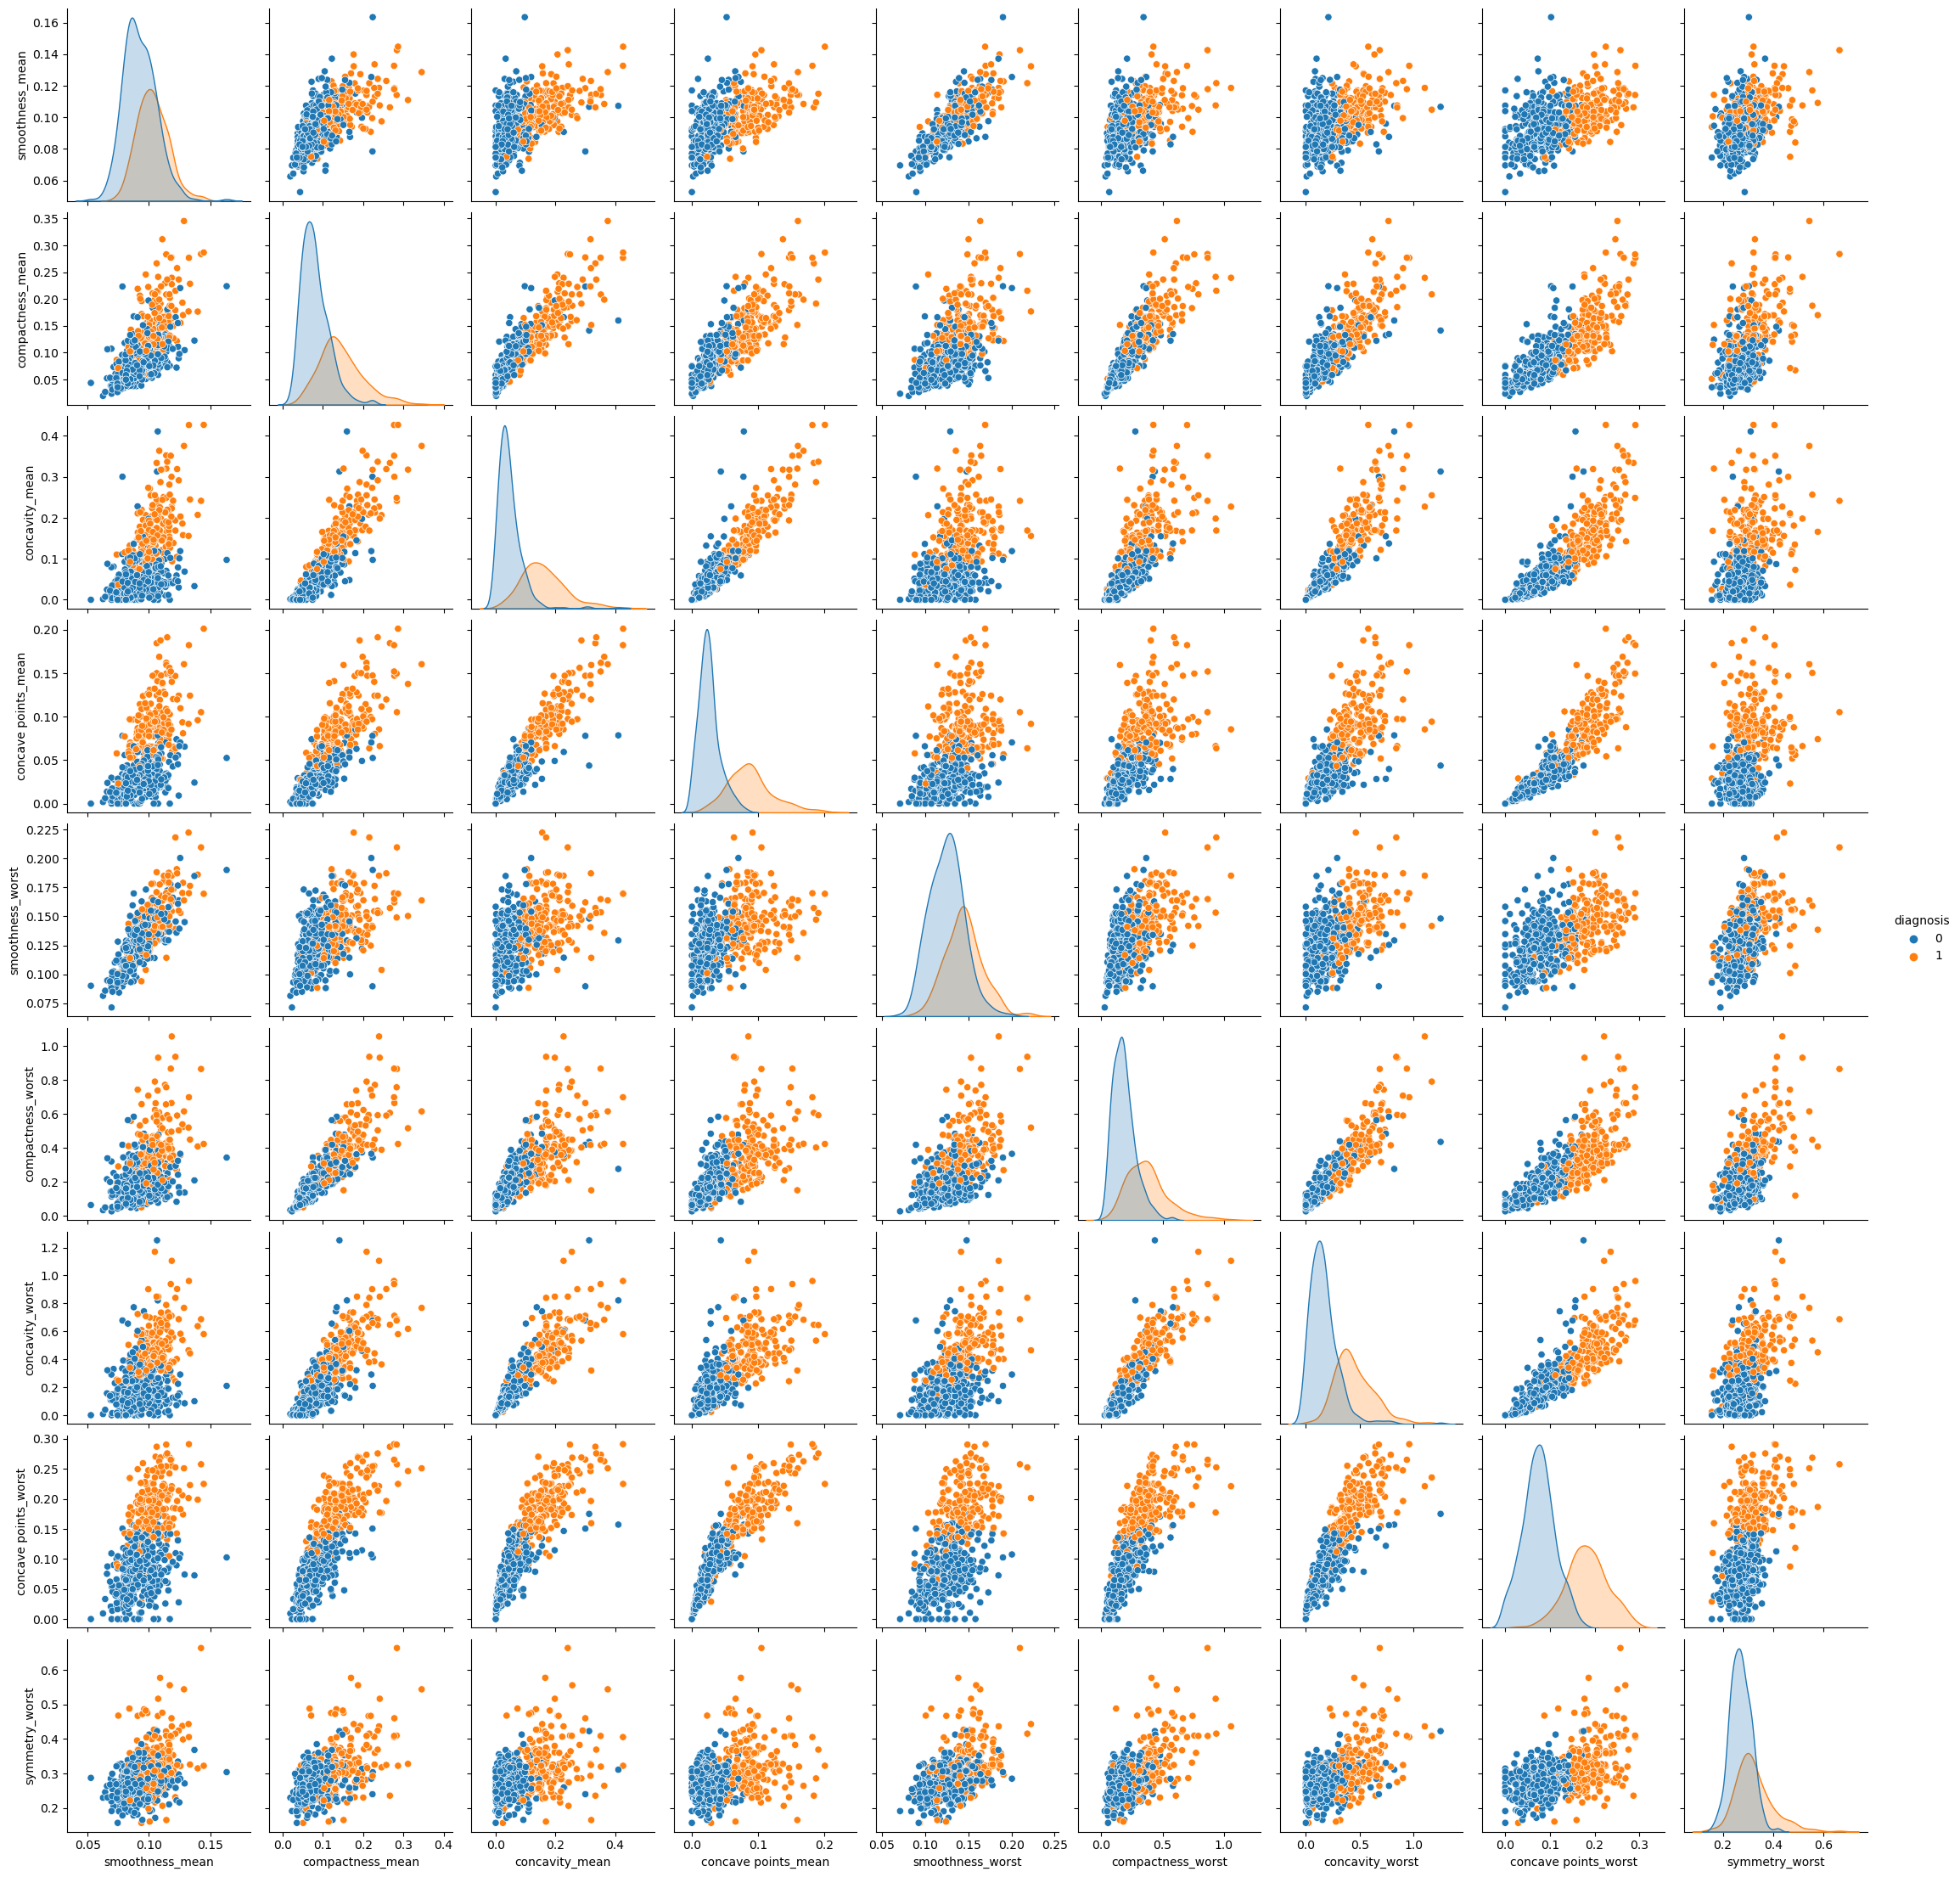

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
num = df[["smoothness_mean","compactness_mean","concavity_mean","concave points_mean","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","diagnosis"]]
sns.heatmap(num.corr(),annot = True)
sns.pairplot(num, hue = "diagnosis")

In [13]:
correlation_matrix = num.corr()
correlations = correlation_matrix['diagnosis'].drop('diagnosis')


In [14]:
correlation_threshold = 0.5
important_features = correlations[correlations.abs() > correlation_threshold].index.tolist()
print(important_features)


['compactness_mean', 'concavity_mean', 'concave points_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [15]:
print(correlation_matrix)

                      smoothness_mean  compactness_mean  concavity_mean  \
smoothness_mean              1.000000          0.659123        0.521984   
compactness_mean             0.659123          1.000000        0.883121   
concavity_mean               0.521984          0.883121        1.000000   
concave points_mean          0.553695          0.831135        0.921391   
smoothness_worst             0.805324          0.565541        0.448822   
compactness_worst            0.472468          0.865809        0.754968   
concavity_worst              0.434926          0.816275        0.884103   
concave points_worst         0.503053          0.815573        0.861323   
symmetry_worst               0.394309          0.510223        0.409464   
diagnosis                    0.358560          0.596534        0.696360   

                      concave points_mean  smoothness_worst  \
smoothness_mean                  0.553695          0.805324   
compactness_mean                 0.831135       

In [16]:
SelectedF = df[["compactness_mean","concavity_mean","concave points_mean","compactness_worst","concavity_worst","concave points_worst"]]

# split data
y = df["diagnosis"].values
x_columns = len(SelectedF.columns)

x = SelectedF.iloc[:,0:x_columns].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

X_validate, X_test, y_validata, y_test = train_test_split(X_test, y_test,test_size = 0.5, random_state = 0)
print(len(X_train), len(X_test),len(X_validate))

455 57 57


In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.9298245614035088


In [19]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = "gini").fit(X_train, y_train)
score_gini = model.score(X_test, y_test)
print(score_gini)

0.9298245614035088


In [20]:
from sklearn.metrics import confusion_matrix
preditions = model.predict(X_validate)
print(confusion_matrix(y_validata,preditions))

[[33  2]
 [ 3 19]]


In [33]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=200, criterion='gini')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
print(score)

from sklearn.metrics import recall_score
print('recall score: '+ str(recall_score(y_test, y_pred,  average='weighted')))

from sklearn.metrics import precision_score
print('precision score: '+ str(precision_score(y_test, y_pred, average='weighted')))

0.9649122807017544
recall score: 0.9649122807017544
precision score: 0.9669762641898865


In [22]:
# train model using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.9122807017543859

In [23]:
scores_forKNN = []
neighbors = range(1,20)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    results = knn.score(X_test,y_test)
    scores_forKNN.append(results)
print(scores_forKNN)

[0.9649122807017544, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859]


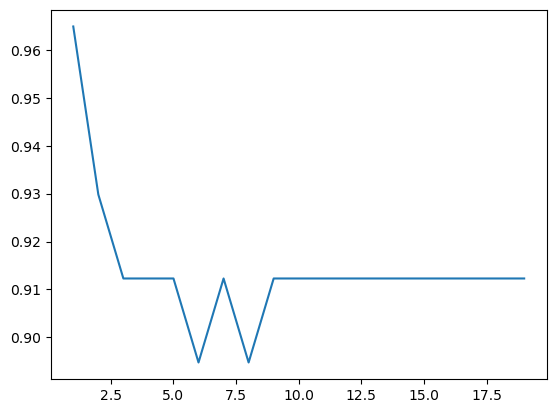

In [24]:
plt.plot(neighbors, scores_forKNN)

In [26]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
score_result_KNN = knn.score(X_test,y_test)
print(score_result_KNN)

0.9649122807017544


In [27]:
from sklearn.metrics import confusion_matrix
preditions = knn.predict(X_test)
print(confusion_matrix(y_test,preditions))

[[32  0]
 [ 2 23]]


In [31]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

y_pred = svc.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
print(conf)


[[30  2]
 [ 6 19]]


In [32]:
svc.score(X_test,y_test)

0.8596491228070176